In [79]:
import numpy as np
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure
plt.style.use('ggplot')

In [84]:
chocolate = pd.read_csv("chocolate_ratings.csv")

In [85]:
chocolate.tail()

,reference_number,manufacturer_name,company_location,review_year,country_of_bean_origin,Bean_origin_or_bar_name,Cocoa_Percent,Ingredients,Most_Memorable_Characteristics,rating,Unnamed: 10
2525,1205,Zotter,Austria,2014,Blend,Raw,0.80,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,NaN
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",0.75,"3- B,S,C","strong nutty, marshmallow",3.75,NaN
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",0.75,"3- B,S,C","fatty, earthy, cocoa",3.00,NaN
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,0.70,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,NaN
2529,2170,Zotter,Austria,2018,Belize,Maya Mtn,0.72,"3- B,S,C","muted, roasty, accessible",3.50,NaN


In [86]:
chocolate.describe


<bound method NDFrame.describe of       reference_number manufacturer_name company_location  review_year  \
0                 2454              5150           U.S.A.         2019   
1                 2458              5150           U.S.A.         2019   
2                 2454              5150           U.S.A.         2019   
3                 2542              5150           U.S.A.         2021   
4                 2546              5150           U.S.A.         2021   
...                ...               ...              ...          ...   
2525              1205            Zotter          Austria         2014   
2526              1996            Zotter          Austria         2017   
2527              2036            Zotter          Austria         2018   
2528              2170            Zotter          Austria         2018   
2529              2170            Zotter          Austria         2018   

     country_of_bean_origin          Bean_origin_or_bar_name  Cocoa_Percent  

In [60]:
#get the names of the fields

choco_test = pd.read_csv('chocolate_ratings.csv')
fields = choco_test.columns.tolist()
fields

['reference_number',
 'manufacturer_name',
 'company_location',
 'review_year',
 'country_of_bean_origin',
 'Bean_origin_or_bar_name',
 'Cocoa_Percent',
 'Ingredients',
 'Most_Memorable_Characteristics',
 'rating',
 'Unnamed: 10']

In [53]:
# Look to see the distribution of null or 'NA' or -1 values across records
for field in fields:
    print(chocolate[field].value_counts().sort_index())

5       1
15      6
24      9
32      6
40      2
       ..
2696    4
2700    4
2704    4
2708    4
2712    2
Name: reference_number, Length: 630, dtype: int64
5150                              7
A. Morin                         26
AMMA                              5
Acalli                            4
Adi aka Fijiana (Easy In Ltd)     4
                                 ..
hexx                             10
iQ Chocolate                      2
organicfair                       6
sweet beans                       4
twenty-four blackbirds            7
Name: manufacturer_name, Length: 580, dtype: int64
Amsterdam      12
Argentina       9
Australia      53
Austria        30
Belgium        63
             ... 
U.S.A.       1136
Vanuatu         4
Venezuela      31
Vietnam        16
Wales           1
Name: company_location, Length: 67, dtype: int64
2006     62
2007     73
2008     92
2009    123
2010    110
2011    163
2012    194
2013    183
2014    247
2015    284
2016    217
2017    105
20

Text(0, 0.5, 'Rating')

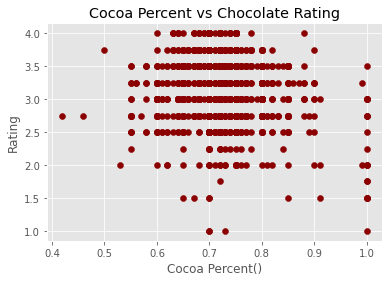

In [61]:
# create scatter plot of cocoa percent when compared to chocolate rating 
choco_percent_rating = chocolate[(chocolate['rating'] != -1) & (chocolate['Cocoa_Percent'] != -1).astype(float)]
plt.scatter(choco_percent_rating['Cocoa_Percent'],choco_percent_rating['rating'], color = 'darkred')
plt.title('Cocoa Percent vs Chocolate Rating')
plt.xlabel('Cocoa Percent()')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

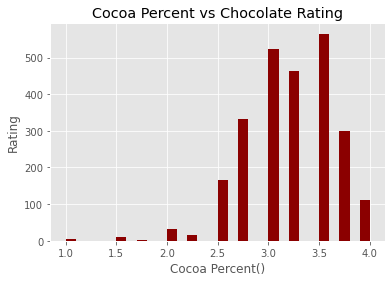

In [63]:
#Histogram of  

choco_rate = chocolate[chocolate['rating'] != -1]
plt.hist(chocolate['rating'], bins = 30, color = 'darkred')
plt.title('Number of Chocoates Rated vs Chocolate Rating')
plt.xlabel('Chocolate Rating ')
plt.ylabel('Number of Chocoates Rated')

In [65]:
# Get distribution of country counts
chocolate['company_location'].value_counts()

U.S.A.                   1136
Canada                    177
France                    176
U.K.                      133
Italy                      78
                         ... 
St.Vincent-Grenadines       1
Martinique                  1
Ghana                       1
Wales                       1
Suriname                    1
Name: company_location, Length: 67, dtype: int64

<AxesSubplot:xlabel='company_location'>

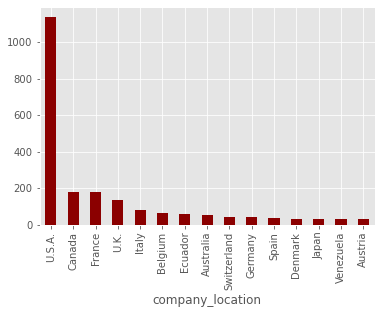

In [103]:
# Acquiring bar charts of top 12 chocolate company locations 
chocolate.groupby('company_location')['rating'].count().sort_values(ascending = False).nlargest(15).plot.bar(color = 'darkred')

<AxesSubplot:xlabel='country_of_bean_origin'>

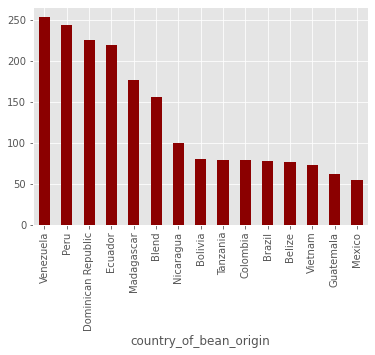

In [101]:
# Acquiring bar charts of top 15 countries producing the chocolate bean
chocolate.groupby('country_of_bean_origin')['rating'].count().sort_values(ascending = False).nlargest(15).plot.bar(color = 'darkred')

<AxesSubplot:xlabel='rating', ylabel='country_of_bean_origin'>

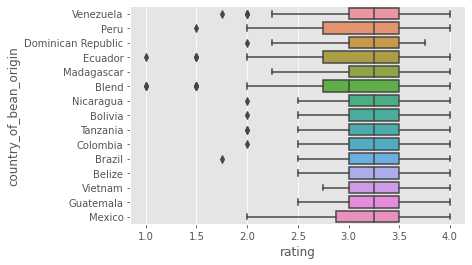

In [102]:
#rating Distribution for country of bean origin
sns.boxplot(y = chocolate['country_of_bean_origin'], x = chocolate['rating'],order=["Venezuela", "Peru", "Dominican Republic", "Ecuador", "Madagascar", "Blend","Nicaragua", "Bolivia", "Tanzania", "Colombia","Brazil","Belize","Vietnam","Guatemala","Mexico"])
            

<AxesSubplot:xlabel='rating', ylabel='company_location'>

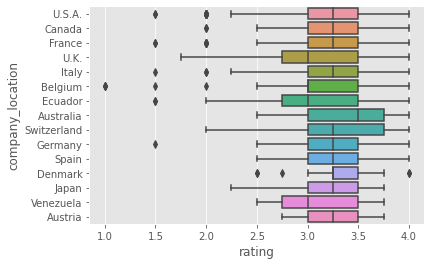

In [117]:
#rating Distribution for Company Location
sns.boxplot(y = chocolate['company_location'], x = chocolate['rating'],order=["U.S.A.", "Canada", "France", "U.K.","Italy", "Belgium", "Ecuador","Australia", "Switzerland", "Germany", "Spain","Denmark","Japan","Venezuela","Austria"])
     

<AxesSubplot:xlabel='manufacturer_name'>

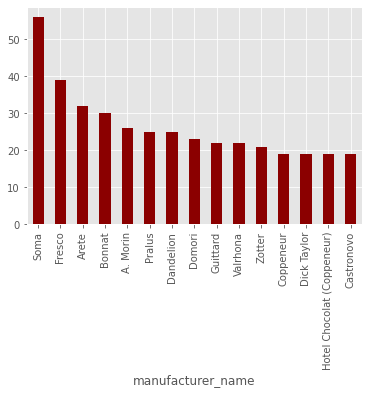

In [118]:
# Acquiring bar charts of top 15 companies producing the chocolate bean
chocolate.groupby('manufacturer_name')['rating'].count().sort_values(ascending = False).nlargest(15).plot.bar(color = 'darkred')

<AxesSubplot:xlabel='rating', ylabel='manufacturer_name'>

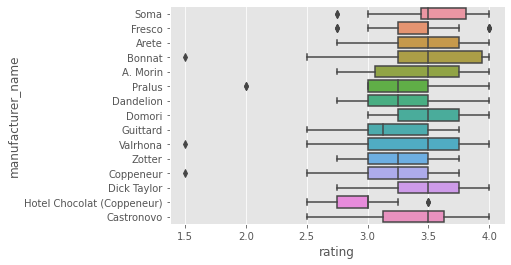

In [120]:
#rating Distribution for 
sns.boxplot(y = chocolate['manufacturer_name'], x = chocolate['rating'],order=["Soma", "Fresco", "Arete", "Bonnat","A. Morin", "Pralus", "Dandelion","Domori", "Guittard", "Valrhona", "Zotter","Coppeneur","Dick Taylor","Hotel Chocolat (Coppeneur)","Castronovo"])
     

<AxesSubplot:xlabel='review_year', ylabel='rating'>

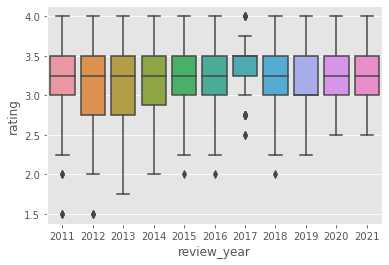

In [114]:
sns.boxplot(y = chocolate['rating'], x = chocolate['review_year'],order = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])